Considerations for defining consistent conventions
* Are we talking about $\mathscr{I}^+$ or $\mathscr{I}^-$?
* metric signature
* Riemann definition
* Weyl tensor (I *think* this definition is actually universal, but the result depends on the metric and Riemann definitions.)
* Weyl spinor (There's a stray minus sign that I'm not sure is universal.)
* tetrad (All sorts of non-uniform factors of $\pm 1$ and $2^{\pm 1/2}$.)
  * $l$
  * $m$
  * $\bar{m}$
  * $n$
* spinor dyad (I believe these are universally related to the tetrad, but I'm not sure.)
* Weyl components (Usually, the differences boil down to an overall sign, but there are exceptions that may or may not be degenerate with the sign of $m$.)
  * $Ψ_0$
  * $Ψ_1$
  * $Ψ_2$
  * $Ψ_3$
  * $Ψ_4$
* supertranslation (Is it $u+\alpha$ or $u-\alpha$?)
* Bondi metric components
* ð (Factors of $\sqrt{2}$ abound.  And what about at $\mathscr{I}$?)
* spherical coordinates (Presumably $\theta$ is the polar angle and $\phi$ is the azimuthal one...)
* stereographic coordinates (Taken from North or South pole?  Is sphere centered on the origin, or is the opposite pole at the origin?)
* P (Is there a factor of 1/2 or not?)

We can probably all agree on Cartesian coordinates.  [I doubt that the volume form will come into anything, but this would be the entry point for that discussion.]  Given those, we can define spherical and stereographic coordinates, and then use those coordinates to express our 

$\newcommand{\convention}[1]{f_{#1}}$

We parametrize the metric signature by $\convention{g} = \pm 1$ if we can express the metric as
\begin{align}
  \convention{g}\, \mathbf{g}(\mathbf{v}, \mathbf{w})
  &=
  \begin{pmatrix} v_0 & v_1 & v_2 & v_3 \end{pmatrix}
  S \begin{pmatrix} -1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix} S^T
  \begin{pmatrix} w_0 \\ w_1 \\ w_2 \\ w_3 \end{pmatrix},
\end{align}
for some invertible matrix $S$, where the indices $(0, 1, 2, 3)$ are taken with respect to any basis.  Sylvester's law of inertia tells us that this uniquely defines $\convention{g}$ (assuming that it can only be $\pm 1$).  A spacetime is defined by its manifold structure and the existence of a special tensor — the metric $\mathbf{g}$.  There are never any topological or differential obstructions to defining another tensor given by $-\mathbf{g}$, and nothing changes about the covariant derivative operator, so it makes perfect sense to think of different choices of signatures as just different choices for which of these tensors we choose to label $\mathbf{g}$.  Under this interpretation, there are two different choices of musical isomorphisms — identifications between vectors and one-forms.  This may seem strange, given that the vectors and one-forms themselves are invariant objects.  Nothing has changed about that; we're just identifying them in two different ways.  This will only cause problems if we define a one-form (respectively, vector) geometrically, and then use the corresponding vector (respectively, one-form) without remembering that we have chosen how to relate them.  This should cancel out if contractions are taken properly.

The idea behind this factor is that anyone should be able to insert their own $\mathbf{g}$ into the equation above, and then adjust the value of $\convention{g}$ so that the equation is true.  Then, if — using my own conventions — I produce an expression in which $g$ appears explicitly, it is implicitly equal to $\convention{g}\, g$, except that my convention is to use $\convention{g} = 1$, so I have dropped it.  The factor of $\convention{g}$ can then be re-inserted and set to something other than $1$ for anyone whose conventions differ, and the expression should produce the same result in their system.

We parametrize the Riemann tensor convention by $\convention{R}$ so that for any one-form $\omega$, we have
\begin{align}
  \convention{R} {R_{abc}}^d \omega_d &= \nabla_a \nabla_b \omega_c - \nabla_b \nabla_a \omega_c.
\end{align}
This necessarily implies that for any vector $v$ we have
\begin{align}
  \convention{R} {R_{abc}}^d v^c &= -\nabla_a \nabla_b v^d + \nabla_b \nabla_a v^d.
\end{align}
[There's also possible ambiguity in the definition of the Ricci tensor, but that's always 0 to me.]  As with the metric, this means that if I derive an expression containing ${R_{abc}}^d$, it is implicitly equal to the same expression with $\convention{R} {R_{abc}}^d$.  Anyone using $\convention{R} \neq 1$ should re-insert this factor.

There is surely no dispute about the relation $R_{abcd} = {R_{abc}}^e g_{ed}$, but we might rewrite this as
\begin{align}
  \convention{g} \convention{R} R_{abcd} &= \convention{g} \convention{R} {R_{abc}}^e g_{ed},
\end{align}
which gives the appropriate substitution.  That is, if I derive an equation with my own conventions that results in an expression involving $R_{abcd}$, another person using different conventions should use that equation only after substituting $R_{abcd} \to \convention{g} \convention{R} R_{abcd}$.  In particular, the Weyl tensor is defined as $C_{abcd} = R_{abcd} + \ldots$ (where $\ldots$ are terms that are 0 to me), which means that we have to substitute $C_{abcd} \to \convention{g} \convention{R} C_{abcd}$.

# Spherical vs. stereographic basis vectors

In [1]:
import sympy
from sympy import symbols, sin, cos, exp, sqrt, cot, pi, I
from sympy.diffgeom import Manifold, Patch, CoordSystem, TensorProduct, vectors_in_basis
from sympy.diffgeom.rn import R2, R2_p, R2_r, R2_origin
from sympy import init_printing
init_printing()

In [2]:
rectangular = R2_r  # CoordSystem('rectangular', Patch(R2_origin, Manifold('R**2', 2)), ('x', 'y'))
polar = R2_p  # CoordSystem('polar', Patch(R2_origin, Manifold('R**2', 2)), ('r', 'theta'))
stereographic = CoordSystem('stereographic', R2_r.patch, (r'\zeta', r'\bar{\zeta}'))

In [7]:
S2 = Manifold('S²', 2)
regular_points = Patch('regular', S2)
spherical = CoordSystem('spherical', regular_points, (r"\theta", r"\phi"))
stereographic = CoordSystem('stereographic', regular_points, (r"\zeta", r"\bar{\zeta}"))

ζ_p, ζ̄_p = symbols(r"\zeta_p, \bar{\zeta}_p")
θ_p, ϕ_p = symbols(r"\theta_p, \phi_p", real=True)

ζ_θ_ϕ = exp(I*ϕ_p) * cot(θ_p/2)
P = (1 + stereographic.coord_function(0) * stereographic.coord_function(1)) / 2

p_sph = spherical.point([θ_p, ϕ_p])
p_ste = stereographic.point([ζ_p, ζ̄_p])

In [8]:
spherical.connect_to(
    stereographic,
    [θ_p, ϕ_p],
    [ζ_θ_ϕ, ζ_θ_ϕ.conjugate()]
)

In [9]:
dθ, dϕ = spherical.base_oneform(0), spherical.base_oneform(1)
dζ, dζ̄ = stereographic.base_oneform(0), stereographic.base_oneform(1)

g_sph = TensorProduct(dθ, dθ) + sin(spherical.coord_function(0))**2 * TensorProduct(dϕ, dϕ)
g_ste = (TensorProduct(dζ, dζ̄) + TensorProduct(dζ̄, dζ)) / 2 / P**2

In [45]:
spherical.metric = TensorProduct(dθ, dθ) + sin(spherical.coord_function(0))**2 * TensorProduct(dϕ, dϕ)
stereographic.metric = (TensorProduct(dζ, dζ̄) + TensorProduct(dζ̄, dζ)) / 2 / P**2

In [38]:
θ̂ᵃ = spherical.base_vector(0)
ϕ̂ᵃ = spherical.base_vector(1) / sin(spherical.coord_function(0))
θ̂_ₐ = g_sph.rcall(θ̂ᵃ)  # spherical.base_oneform(0)
ϕ̂_ₐ = g_sph.rcall(ϕ̂ᵃ)  # sin(spherical.coord_function(0)) * spherical.base_oneform(1)

In [39]:
mᵃ = sqrt(2) * P * stereographic.base_vector(0)
m̄ᵃ = sqrt(2) * P * stereographic.base_vector(1)
m_ₐ = g_ste.rcall(mᵃ)  # stereographic.base_oneform(1) / sqrt(2) / P
m̄_ₐ = g_ste.rcall(m̄ᵃ)  # stereographic.base_oneform(0) / sqrt(2) / P

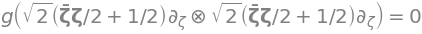

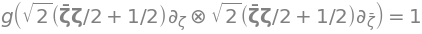

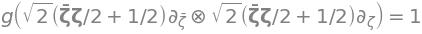

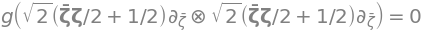

In [42]:
g = sympy.Function('g')

for a, b in [[mᵃ, mᵃ], [mᵃ, m̄ᵃ], [m̄ᵃ, mᵃ], [m̄ᵃ, m̄ᵃ]]:
    display(sympy.Eq(g(TensorProduct(a, b)), sympy.simplify(g_ste.rcall(a, b))))

In [43]:
for a, b in [[θ̂, θ̂], [θ̂, ϕ̂], [ϕ̂, θ̂], [ϕ̂, ϕ̂]]:
    display(sympy.Eq(g(TensorProduct(a, b)), sympy.simplify(g_sph.rcall(a, b))))

In [27]:
m_ₐ.rcall(mᵃ), m_ₐ.rcall(m̄ᵃ), m̄_ₐ.rcall(mᵃ), m̄_ₐ.rcall(m̄ᵃ)

In [64]:
def convert_vector(v, from_sys, to_sys, to_point):
    trig_abs_subs = {sympy.Abs(cot(θ_p/2)): cot(θ_p/2)}
    vprime = sympy.simplify(vectors_in_basis(v, to_sys))
    return sum(sympy.simplify(ω(vprime).rcall(to_point).subs(trig_abs_subs)) * v
               for v, ω in zip(to_sys.base_vectors(), to_sys.base_oneforms()))

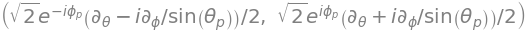

In [65]:
sympy.simplify(convert_vector(mᵃ, stereographic, spherical, p_sph)), sympy.simplify(convert_vector(m̄ᵃ, stereographic, spherical, p_sph))

This looks bad.  It looks like we've got $m$ and $\bar{m}$ mixed up.  Let's try this manually.

Moreschi's Eq. (A47a) is
\begin{equation}
  \hat{m}^a = \sqrt{2} P \left( \frac{\partial} {\partial \zeta} \right)^a
\end{equation}
I drop the hat, and Moreschi also declares $P \equiv \frac{1}{2}(1 + \zeta \bar{\zeta}) = 1/(1-\cos \theta)$.

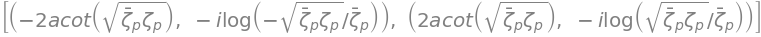

In [67]:
sympy.solve((sympy.Eq(ζ_p, ζ_θ_ϕ), sympy.Eq(ζ̄_p, ζ_θ_ϕ.conjugate())), (θ_p, ϕ_p))

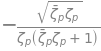

In [61]:
sympy.simplify(sympy.Derivative(2*sympy.acot(sympy.sqrt(ζ_p * ζ̄_p)), ζ_p).doit())

In [62]:
sympy.simplify(sympy.Derivative(-I*sympy.log(sympy.sqrt(ζ_p / ζ̄_p)), ζ_p).doit())

\begin{align}
  \sqrt{2} P \frac{\partial} {\partial \zeta}
  &=
  \sqrt{2}P \frac{\partial \theta} {\partial \zeta} \frac{\partial} {\partial \theta}
  +\frac{\sqrt{2}}{1-\cos\theta} \frac{\partial \phi} {\partial \zeta} \frac{\partial} {\partial \phi}
  \\&=
  -\sqrt{2}P \sqrt{\frac{\bar{\zeta}} {\zeta}} \frac{1} {2P} \frac{\partial} {\partial \theta}
  -\frac{\sqrt{2}}{1-\cos\theta} \frac{i} {2\zeta} \frac{\partial} {\partial \phi}
  \\&=
  -e^{-i\phi} \frac{1} {\sqrt{2}} \frac{\partial} {\partial \theta}
  -e^{-i\phi}\frac{1}{(1-\cos\theta)\cot \frac{\theta}{2}} \frac{i} {\sqrt{2}} \frac{\partial} {\partial \phi}
  \\&=
  -e^{-i\phi} \frac{1} {\sqrt{2}} \frac{\partial} {\partial \theta}
  -e^{-i\phi} \frac{i} {\sqrt{2}} \frac{1}{\sin\theta} \frac{\partial} {\partial \phi}
  \\&=
  -e^{-i\phi} \left[ \frac{1} {\sqrt{2}} \left( \frac{\partial} {\partial \theta}
  +i\frac{1}{\sin\theta} \frac{\partial} {\partial \phi} \right) \right]
\end{align}

This looks better, because we at least agree on the meaning of $m$ up to a constant factor.  Here, I've chosen the solution for $\theta(\zeta, \bar{\zeta}), \phi(\zeta, \bar{\zeta})$ to give positive values of $\theta$ — which is certainly the right choice.  If I had made the other choice, I would have gotten a relative sign in front of $\partial_\theta$, which is what we saw above; I guess sympy just automatically chose the wrong sign here.  These are the relevant derivatives for that wrong choice:

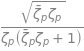

In [70]:
sympy.simplify(sympy.Derivative(-2*sympy.acot(sympy.sqrt(ζ_p * ζ̄_p)), ζ_p).doit())

In [69]:
sympy.simplify(sympy.Derivative(-I*sympy.log(-sympy.sqrt(ζ_p / ζ̄_p)), ζ_p).doit())

We see that the first switches sign, while the second does not, so this does explain the discrepancy.

Just to be sure, let's check that the derivative with respect to $\bar{\zeta}$ would really just be the conjugate of this result.

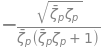

In [71]:
sympy.simplify(sympy.Derivative(2*sympy.acot(sympy.sqrt(ζ_p * ζ̄_p)), ζ̄_p).doit())

In [72]:
sympy.simplify(sympy.Derivative(-I*sympy.log(sympy.sqrt(ζ_p / ζ̄_p)), ζ̄_p).doit())

And indeed, both of these are just the conjugates of the derivatives we used above, so that carries through.

\begin{align}
  u &= t-r & \Omega &= 1/r \\
  t &= u - 1/\Omega & r &= 1/\Omega
\end{align}

\begin{align}
  \mathbf{n}_{\text{Moreschi}} &= \frac{\partial} {\partial u}
  &
  \mathbf{l}_{\text{Moreschi}} &= -\frac{\partial} {\partial \Omega} 
  \\
  &= \frac{\partial t} {\partial u} \frac{\partial} {\partial t} + \frac{\partial r} {\partial u} \frac{\partial} {\partial r}
  &
  &= -\frac{\partial t} {\partial \Omega} \frac{\partial} {\partial t} - \frac{\partial r} {\partial \Omega} \frac{\partial} {\partial r}
  \\
  &= \frac{\partial} {\partial t} + \frac{\partial} {\partial r}
  &
  &= -\frac{1} {\Omega^2} \frac{\partial} {\partial t} + \frac{1} {\Omega^2} \frac{\partial} {\partial r}
  \\
  &= \sqrt{2} \mathbf{n}_{\text{SXS}}
  &
  &= -\frac{\sqrt{2}} {\Omega^2} \mathbf{l}_{\text{SXS}}
\end{align}

\begin{align}
  \mathbf{n}_{\text{Moreschi}} &= \mathbf{n}_{\text{GLQ}} = \sqrt{2} \mathbf{n}_{\text{SXS}}
  \\
  \mathbf{l}_{\text{Moreschi}} &= \mathbf{l}_{\text{GLQ}} = -\sqrt{2} \mathbf{l}_{\text{SXS}}
  \\
  \mathbf{m}_{\text{Moreschi}} &= - \frac{1}{\sqrt{2}} \mathbf{m}_{\text{GLQ}} = -\mathbf{m}_{\text{SXS}}
\end{align}

\begin{align}
  \mathbf{n}_{\text{SXS}} &= \frac{1}{\sqrt{2}} \mathbf{n}_{\text{Moreschi}} = \frac{1}{\sqrt{2}} \mathbf{n}_{\text{GLQ}}
  \\
  \mathbf{l}_{\text{SXS}} &= - \frac{1}{\sqrt{2}} \mathbf{l}_{\text{Moreschi}} = - \frac{1}{\sqrt{2}}\mathbf{l}_{\text{GLQ}}
  \\
  \mathbf{m}_{\text{SXS}} &= -\mathbf{m}_{\text{Moreschi}} = \frac{1}{\sqrt{2}} \mathbf{m}_{\text{GLQ}}
\end{align}

\begin{align}
  \eth_{\text{Moreschi}} &= \eth_{\text{GHP}} = \frac{1}{\sqrt{2}} \eth_{\text{GLQ}} = \frac{1}{\sqrt{2}} \eth_{\text{NP}}
\end{align}

I'm not entirely sure about some of these relations, because the overall signs aren't 100% clear to me, but I think at worst we just get one system or another all multiplied by $-1$, which doesn't lead to any inconsistencies.

\begin{align}
  σ^{\text{SXS}}
  %= γ_{133} = {γ^2}_{33}
  %&= m^a_{\text{SXS}} m^b_{\text{SXS}} \nabla_a l_b^{\text{SXS}}
  %&= -\sqrt{2} m^a_{\text{Moreschi}} m^b_{\text{Moreschi}} \nabla_a l_b^{\text{Moreschi}}
  &= -\sqrt{2} \sigma^{\text{Moreschi}} = \frac{1}{\sqrt{2}} \sigma^{\text{GLQ}}
\end{align}

\begin{align}
  \Psi_4^{\text{SXS}}
  %= C_{abcd} n^a_{\text{SXS}} \bar{m}^b_{\text{SXS}} n^c_{\text{SXS}} \bar{m}^d_{\text{SXS}}
  %= C_{abcd} n^a_{\text{Moreschi}} \bar{m}^b_{\text{Moreschi}} n^c_{\text{Moreschi}} \bar{m}^d_{\text{Moreschi}} / 2
  &= \frac{1}{2} \Psi_4^{\text{Moreschi}} = \frac{1}{4} \Psi_4^{\text{GLQ}}
  \\
  \Psi_3^{\text{SXS}}
  %= C_{abcd} l^a_{\text{SXS}} n^b_{\text{SXS}} \bar{m}^c_{\text{SXS}} n^d_{\text{SXS}}
  %= C_{abcd} l^a_{\text{Moreschi}} n^b_{\text{Moreschi}} \bar{m}^c_{\text{Moreschi}} n^d_{\text{Moreschi}} / 2\sqrt{2}
  &= \frac{1}{2\sqrt{2}} \Psi_3^{\text{Moreschi}} = -\frac{1}{4} \Psi_3^{\text{GLQ}}
  \\
  \Psi_2^{\text{SXS}}
  %= C_{abcd} l^a_{\text{SXS}} m^b_{\text{SXS}} \bar{m}^c_{\text{SXS}} n^d_{\text{SXS}}
  %= C_{abcd} l^a_{\text{Moreschi}} m^b_{\text{Moreschi}} \bar{m}^c_{\text{Moreschi}} n^d_{\text{Moreschi}} / -2
  &= -\frac{1}{2} \Psi_2^{\text{Moreschi}} = -\frac{1}{4} \Psi_2^{\text{GLQ}}
  \\
  \Psi_1^{\text{SXS}}
  %= C_{abcd} l^a_{\text{SXS}} n^b_{\text{SXS}} l^c_{\text{SXS}} m^d_{\text{SXS}}
  %= C_{abcd} l^a_{\text{Moreschi}} n^b_{\text{Moreschi}} l^c_{\text{Moreschi}} m^d_{\text{Moreschi}} / -2\sqrt{2}
  &= -\frac{1}{2\sqrt{2}} \Psi_1^{\text{Moreschi}} = \frac{1}{4} \Psi_1^{\text{GLQ}}
  \\
  \Psi_0^{\text{SXS}}
  %= C_{abcd} l^a_{\text{SXS}} m^b_{\text{SXS}} l^c_{\text{SXS}} m^d_{\text{SXS}}
  %= C_{abcd} l^a_{\text{Moreschi}} m^b_{\text{Moreschi}} l^c_{\text{Moreschi}} m^d_{\text{Moreschi}} / 2
  &= \frac{1}{2} \Psi_0^{\text{Moreschi}} = \frac{1}{4} \Psi_0^{\text{GLQ}}
\end{align}